In [42]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd 
import numpy as np 

from pyxlsb import open_workbook as open_xlsb

df = []

with open_xlsb('txn_details.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])

In [44]:
df.head()

,Sr. No.,Store Name,City,POS,Hardware Model,Acquirer,TID,MID,Batch No,Card No,...,Status,Settlement Date,Cashier,Bill Invoice,RRN,EMI Txn,EMI Month,Contactless,Contactless Mode,Cloud Ref ID
0,1.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1165.0,517252******0924,...,Settled,21/05/2019 21:29:34,None,1234,'000000009461,No,None,No,INVALID,0.0
1,2.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1166.0,524181******8872,...,Settled,22/05/2019 19:38:47,None,12,'000000009463,No,None,No,INVALID,0.0
2,3.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,517725******4817,...,Settled,23/05/2019 19:52:55,None,12345,'000000009465,No,None,No,INVALID,0.0
3,4.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,517725******2843,...,Settled,23/05/2019 19:52:55,None,123,'000000009466,No,None,No,INVALID,0.0
4,5.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,524247******3152,...,Settled,23/05/2019 19:52:55,None,1,'000000009467,Yes,NoEMIOnlyCashbck,No,INVALID,0.0


In [45]:
df['Settlement Date']=  pd.to_datetime(df['Settlement Date'])
df['Date']=  pd.to_datetime(df['Date'])

In [46]:
df.columns

Index(['Sr. No.', 'Store Name', 'City', 'POS', 'Hardware Model', 'Acquirer',
       'TID', 'MID', 'Batch No', 'Card No', 'Name', 'Card Issuer', 'Card Type',
       'Card Network', 'Card Colour', 'Transaction ID', 'Invoice',
       'Approval Code', 'Type', 'Amount', 'TIP Amount', 'Currency',
       'Amount(INR)', 'Date', 'Status', 'Settlement Date', 'Cashier',
       'Bill Invoice', 'RRN', 'EMI Txn', 'EMI Month', 'Contactless',
       'Contactless Mode', 'Cloud Ref ID'],
      dtype='object')

In [47]:
def get_dom(dt):
    return dt.day

df['Day'] = df['Date'].map(get_dom)

In [48]:
df[['Date','Day']].head()

,Date,Day
0,2019-05-21 19:40:33,21
1,2019-05-22 14:57:18,22
2,2019-05-23 10:55:14,23
3,2019-05-23 12:02:20,23
4,2019-05-23 17:12:08,23


In [49]:
def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['Date'].map(get_weekday)

def get_hour(dt):
    return dt.hour

df['hour'] = df['Date'].map(get_hour)

df.tail()

,Sr. No.,Store Name,City,POS,Hardware Model,Acquirer,TID,MID,Batch No,Card No,...,Bill Invoice,RRN,EMI Txn,EMI Month,Contactless,Contactless Mode,Cloud Ref ID,Day,weekday,hour
47117,47118.0,8889 DIGITAL BLR,BANGALORE,537543.0,IWL225-01T3488A,HDFC,4.146e+07,None,3.0,530842******1660,...,5,'000000000213,No,None,Yes,EMV,0.0,30,3,12
47118,47119.0,8889 DIGITAL BLR,BANGALORE,537543.0,IWL225-01T3488A,HDFC,4.146e+07,None,3.0,530842******1660,...,5,'000000000214,No,None,Yes,EMV,0.0,30,3,13
47119,47120.0,8889 DIGITAL BLR,BANGALORE,537543.0,IWL225-01T3488A,HDFC,4.146e+07,None,3.0,559860******4096,...,5,'000000000211,No,None,Yes,EMV,0.0,30,3,12
47120,47121.0,8889 DIGITAL BLR,BANGALORE,537543.0,IWL225-01T3488A,HDFC,4.146e+07,None,3.0,530842******1660,...,4,'000000000217,No,None,Yes,EMV,0.0,31,4,11
47121,47122.0,8889 DIGITAL BLR,BANGALORE,537543.0,IWL225-01T3488A,HDFC,4.146e+07,None,3.0,530842******1660,...,7,'000000000218,No,None,Yes,EMV,0.0,31,4,12


In [50]:
dayOfWeek={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}
df['weekday_name'] = df['Date'].dt.dayofweek.map(dayOfWeek)
df.head()

,Sr. No.,Store Name,City,POS,Hardware Model,Acquirer,TID,MID,Batch No,Card No,...,RRN,EMI Txn,EMI Month,Contactless,Contactless Mode,Cloud Ref ID,Day,weekday,hour,weekday_name
0,1.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1165.0,517252******0924,...,'000000009461,No,None,No,INVALID,0.0,21,1,19,Tues
1,2.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1166.0,524181******8872,...,'000000009463,No,None,No,INVALID,0.0,22,2,14,Wed
2,3.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,517725******4817,...,'000000009465,No,None,No,INVALID,0.0,23,3,10,Thurs
3,4.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,517725******2843,...,'000000009466,No,None,No,INVALID,0.0,23,3,12,Thurs
4,5.0,RRGHANSOLIMUMBAI,NAVI MUMBAI,60933.0,IWL221-01T1330A,HDFC,4.09566e+07,None,1167.0,524247******3152,...,'000000009467,Yes,NoEMIOnlyCashbck,No,INVALID,0.0,23,3,17,Thurs


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'count_txn by Day - Txn - may 2019')

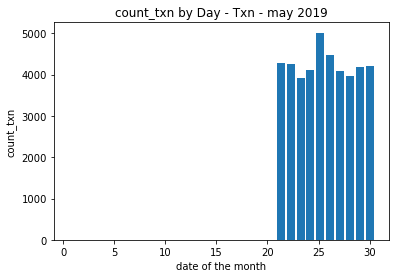

In [52]:
hist(df.Day, bins=31, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('count_txn')
title('count_txn by Day - Txn - may 2019')

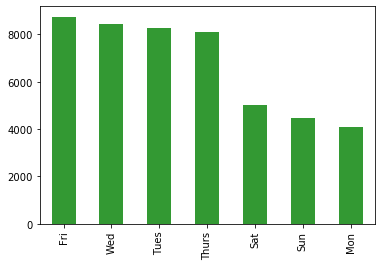

In [53]:
df['weekday_name'].value_counts().plot(kind='bar',color='green',alpha=.8)


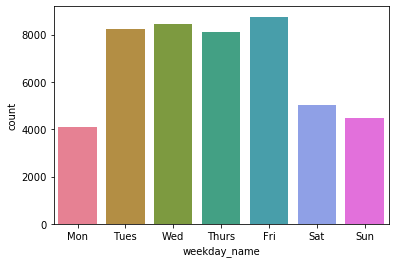

In [54]:
sns.countplot(x='weekday_name',data=df,order=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'],palette ="husl" )

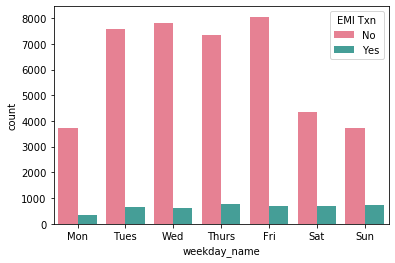

In [74]:
sns.countplot(x='weekday_name',hue='EMI Txn',data=df,order=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'],palette ="husl" )

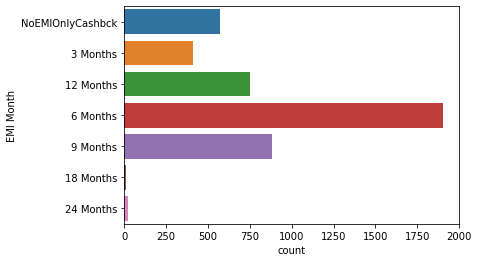

In [69]:
sns.countplot(y='EMI Month',data=df)

In [56]:
df['EMI Txn'].value_counts()

No     42570
Yes     4552
Name: EMI Txn, dtype: int64

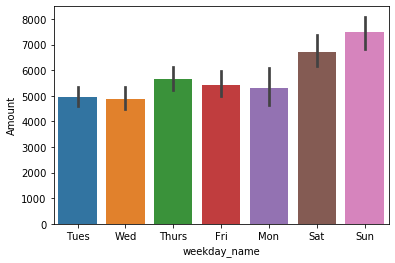

In [58]:
sns.barplot(x='weekday_name',y='Amount',data=df,ci= 100)

In [59]:
df['Amount_bin']=pd.cut(df['Amount'],[0,300,500,1000,1500,2000,3000,5000,10000,50000,100000])

(array([4.6742e+04, 3.5600e+02, 1.6000e+01, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 6.000090e+04, 1.200008e+05, 1.800007e+05,
        2.400006e+05, 3.000005e+05, 3.600004e+05, 4.200003e+05,
        4.800002e+05, 5.400001e+05, 6.000000e+05]),
 <a list of 10 Patch objects>)

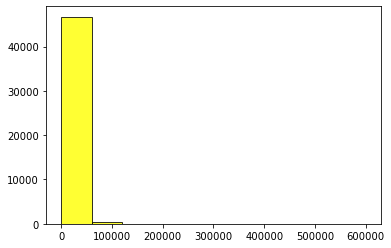

In [60]:
plt.hist(df['Amount'],edgecolor='black',color='yellow',alpha=.8)


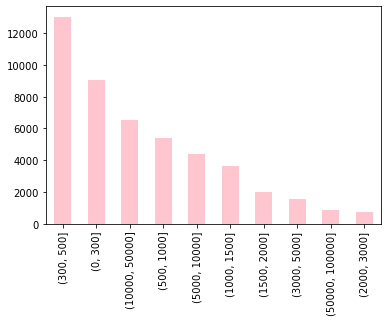

In [61]:
df['Amount_bin'].value_counts().plot(kind='bar',color='pink',alpha=.9)

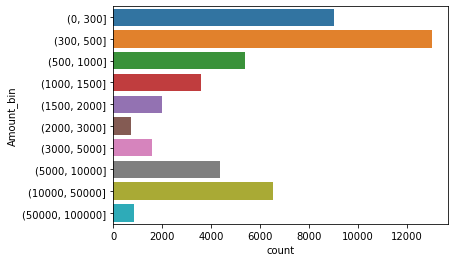

In [62]:
sns.countplot(y="Amount_bin",data=df)

(array([  29., 2311., 3649., 7684., 3237., 5956., 8469., 5755., 9310.,
         722.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 10 Patch objects>)

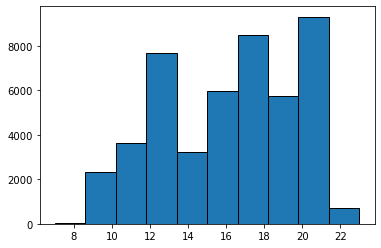

In [63]:
hist(df.hour,edgecolor='black')

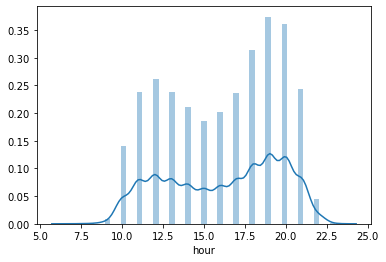

In [64]:
sns.distplot(df.hour)

(array([   6.,   23.,  145., 2166., 3649., 4012., 3672., 3237., 2850.,
        3106., 3633., 4836., 5755., 5550., 3760.,  702.,   20.]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24]),
 <a list of 17 Patch objects>)

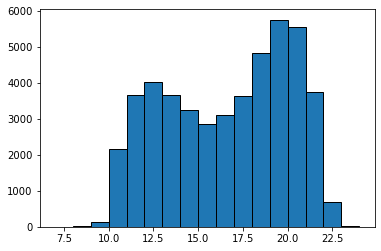

In [65]:
hist(df.hour,edgecolor='black',bins=[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

(array([  0.,   1.,   3.,  32., 144., 268., 343., 347., 313., 361., 388.,
        448., 556., 624., 579., 143.,   2.]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24]),
 <a list of 17 Patch objects>)

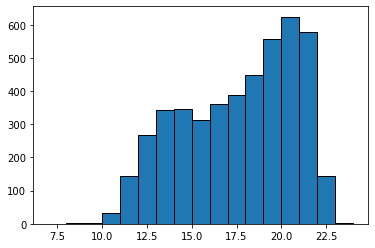

In [72]:
hist(df[df['EMI Txn']=='Yes'].hour,edgecolor='black',bins=[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])